### Testing model comparison

In [57]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from ltu_ili_testing import SBI_Fitter
import numpy as np
from ili.dataloaders import NumpyLoader

grid_path_1 = '/home/tharvey/work/output/grid_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_v1.hdf5'
grid_path_2 = '/home/tharvey/work/output/grid_Pop_II_LogNormal_SFH_5_z_12_logN_5.0_BPASS_Chab_SMC_v1.hdf5'

device = 'cuda:0'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
fitter_calzetti = SBI_Fitter.init_from_hdf5('BPASS_Chab_LogNorm_5_z_12_calzetti_compare_fixed', 
                                grid_path_1, return_output=False, device='cpu')

fitter_smc = SBI_Fitter.init_from_hdf5('BPASS_Chab_LogNorm_5_z_12_smc_compare_fixed', 
                                grid_path_2, return_output=False, device='cpu')

### Generate training data

In [59]:
fitter_calzetti.create_feature_array_from_raw_photometry(normalize_method=None,
                                                         extra_features=[]);
                                                        

fitter_smc.create_feature_array_from_raw_photometry(normalize_method=None,
                                                         extra_features=[]);

---------------------------------------------
Features: 100000 features over 20 samples
---------------------------------------------
Feature: Min - Max
---------------------------------------------
NIRCam.F070W: 21.384 - 50.000 AB
NIRCam.F090W: 19.759 - 50.000 AB
NIRCam.F115W: 19.533 - 50.000 AB
NIRCam.F140M: 19.640 - 50.000 AB
NIRCam.F150W: 19.666 - 42.887 AB
NIRCam.F162M: 19.382 - 41.489 AB
NIRCam.F182M: 19.386 - 41.191 AB
NIRCam.F200W: 19.375 - 41.193 AB
NIRCam.F210M: 19.360 - 41.262 AB
NIRCam.F250M: 19.415 - 40.193 AB
NIRCam.F277W: 19.419 - 39.720 AB
NIRCam.F300M: 19.431 - 39.453 AB
NIRCam.F335M: 18.688 - 39.107 AB
NIRCam.F356W: 19.162 - 38.960 AB
NIRCam.F360M: 18.896 - 38.955 AB
NIRCam.F410M: 19.350 - 38.677 AB
NIRCam.F430M: 18.503 - 38.605 AB
NIRCam.F444W: 19.162 - 38.420 AB
NIRCam.F460M: 18.377 - 38.405 AB
NIRCam.F480M: 19.062 - 38.008 AB
---------------------------------------------
---------------------------------------------
Features: 100000 features over 20 samples
-------

### Train Models

Need a NPE and NLE model to get samples and likelihood. Training NPE and NLE for each model on the same training data.

In [4]:
train_idx, test_idx = fitter_calzetti.split_dataset(0.8, random_seed=42)
nle1, nle1_stats = fitter_calzetti.run_single_sbi(engine='NLE', set_self=False, model_type='maf',
                                         plot=True, name_append='_NLE', hidden_features=25, num_transforms=2, 
                                         train_indices=train_idx, test_indices=test_idx, learning_rate=1e-4, stop_after_epochs=10)

npe1, npe1_stats = fitter_calzetti.run_single_sbi(engine='NPE', learning_rate=5e-4, set_self=False, 
                                         plot=True, name_append='_NPE', train_indices=train_idx, test_indices=test_idx)


train_idx, test_idx = fitter_smc.split_dataset(0.8, random_seed=42)
nle2, _ = fitter_smc.run_single_sbi(engine='NLE', set_self=False,  model_type='maf',
                                    plot=True, name_append='_NLE', hidden_features=100, num_transforms=5, 
                                    train_indices=train_idx, test_indices=test_idx)
npe2, _ = fitter_smc.run_single_sbi(engine='NPE', learning_rate=1e-3, set_self=False, 
                                    plot=True, name_append='_NPE', train_indices=train_idx, test_indices=test_idx)

Splitting dataset with 100000 samples into training and testing sets with 0.80 train fraction.
/home/tharvey/work/ltu-ili_testing/models/BPASS_Chab_LogNorm_5_z_12_calzetti_compare_fixed/BPASS_Chab_LogNorm_5_z_12_calzetti_compare_fixed_NLE_params.pkl
Loading existing model from /home/tharvey/work/ltu-ili_testing/models/BPASS_Chab_LogNorm_5_z_12_calzetti_compare_fixed/BPASS_Chab_LogNorm_5_z_12_calzetti_compare_fixed_NLE_params.pkl
/home/tharvey/work/ltu-ili_testing/models/BPASS_Chab_LogNorm_5_z_12_calzetti_compare_fixed/BPASS_Chab_LogNorm_5_z_12_calzetti_compare_fixed_NPE_params.pkl
Loading existing model from /home/tharvey/work/ltu-ili_testing/models/BPASS_Chab_LogNorm_5_z_12_calzetti_compare_fixed/BPASS_Chab_LogNorm_5_z_12_calzetti_compare_fixed_NPE_params.pkl
Splitting dataset with 100000 samples into training and testing sets with 0.80 train fraction.
/home/tharvey/work/ltu-ili_testing/models/BPASS_Chab_LogNorm_5_z_12_smc_compare_fixed/BPASS_Chab_LogNorm_5_z_12_smc_compare_fixed_NLE_

Plot diagnostics for the NLE method - note need to changing sampling method, as direct sampling only works for NPE 

  0%|          | 0/2000 [00:00<?, ?it/s]


Converged with loss: -25.73


INFO:root:Saving single posterior plot to /home/tharvey/work/ltu-ili_testing/models/BPASS_Chab_LogNorm_5_z_12_calzetti_compare4/plots/BPASS_Chab_LogNorm_5_z_12_calzetti_compare4_14856_plot_single_posterior.jpg...
  0%|          | 79/20000 [04:17<18:00:42,  3.25s/it]


KeyboardInterrupt: 

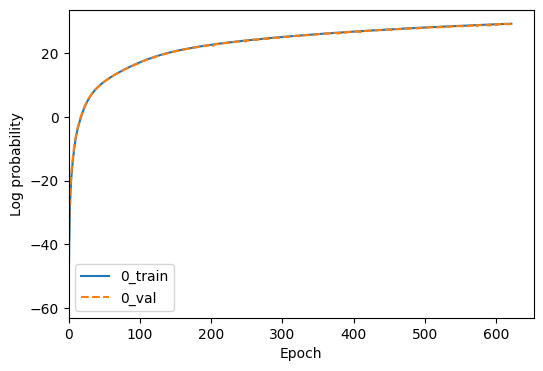

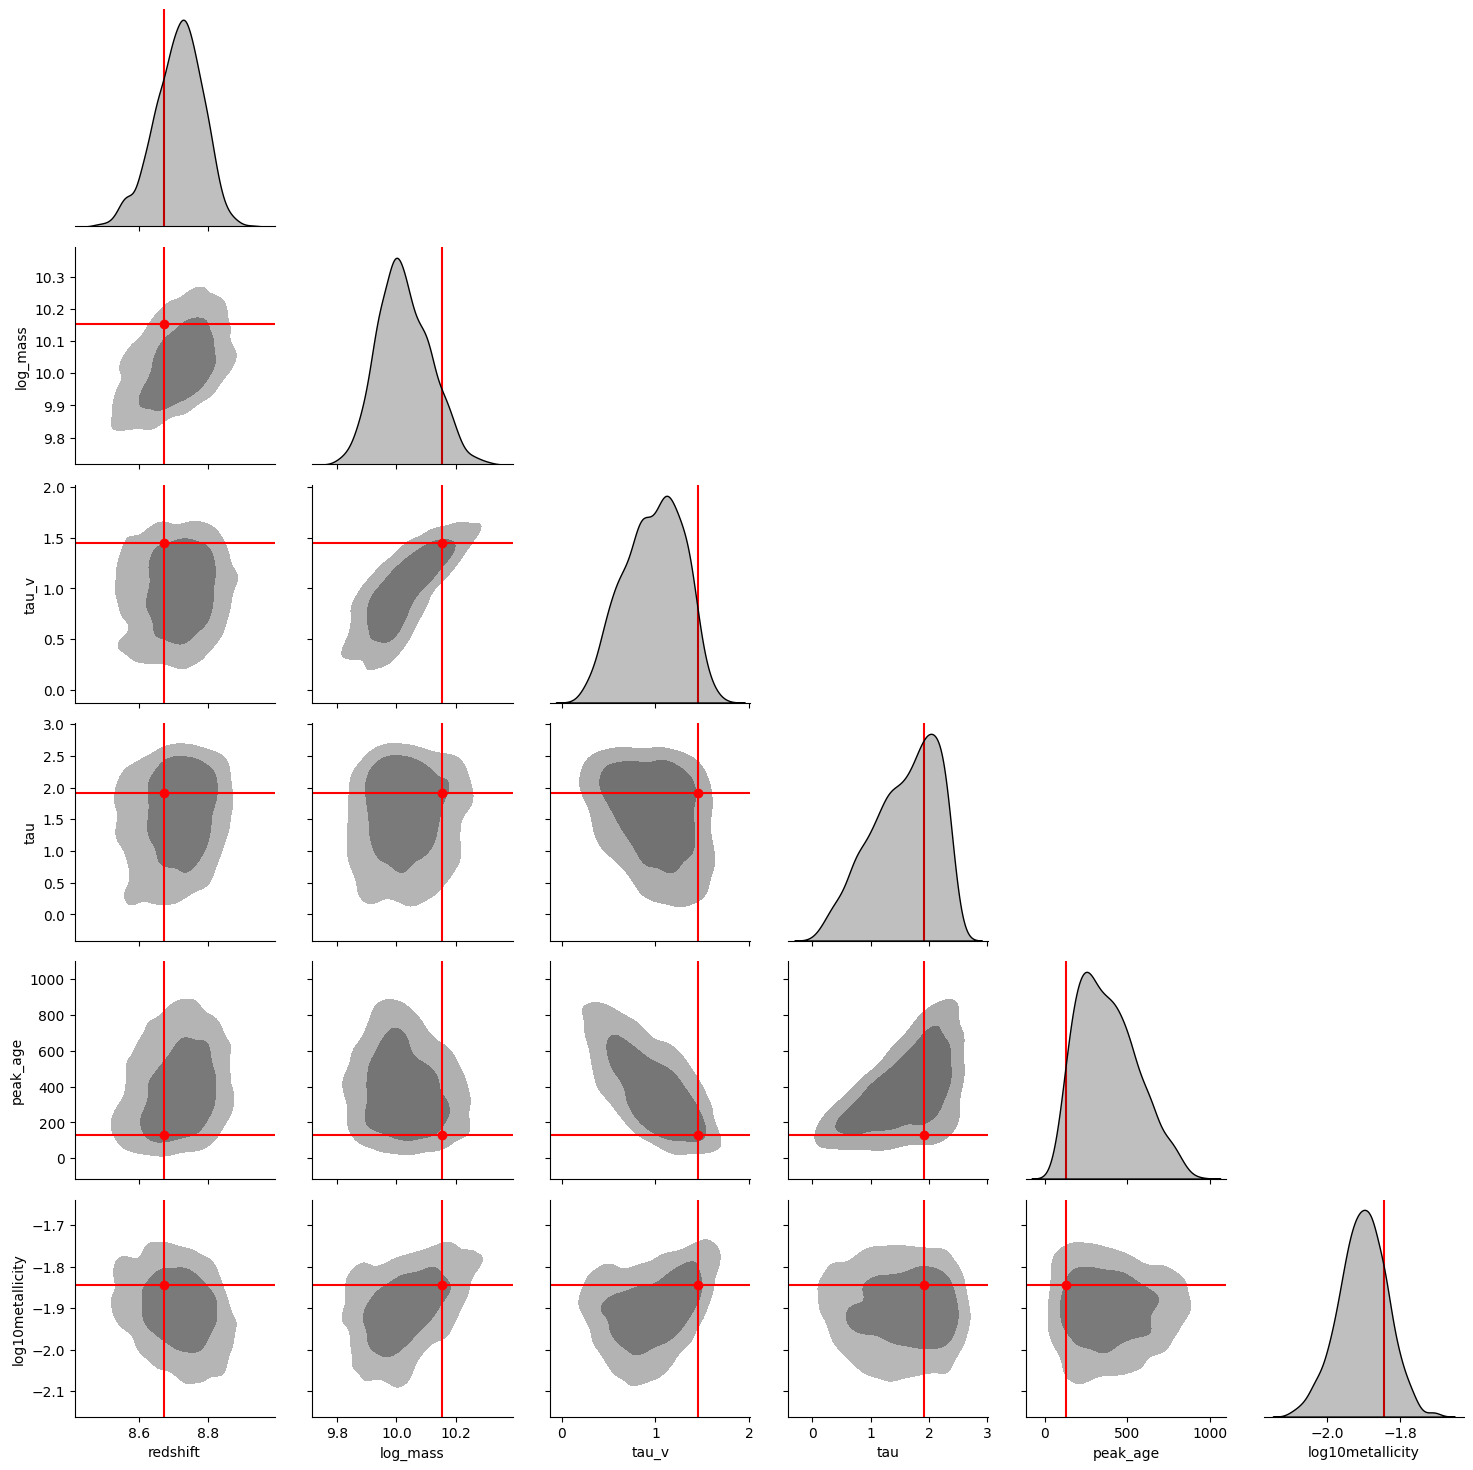

In [18]:
fitter_calzetti.plot_diagnostics(X_train=fitter_calzetti.feature_array[train_idx], y_train=fitter_calzetti.fitted_parameter_array[train_idx],
                                 X_test=fitter_calzetti.feature_array[test_idx], y_test=fitter_calzetti.fitted_parameter_array[test_idx],
                                 stats=nle1_stats, sample_method='vi', posteriors=nle1)

### Draw a test observation from test data - this is a Calzetti model

In [6]:
train_idx, test_idx = fitter_calzetti.split_dataset(0.8, random_seed=42)

random_test = np.random.choice(test_idx, size=1, replace=False)

test_params = fitter_calzetti.fitted_parameter_array[random_test]

print(test_params)

x_obs = fitter_calzetti.feature_array[random_test]

print(x_obs)


Splitting dataset with 100000 samples into training and testing sets with 0.80 train fraction.
[[11.37035847  7.48916674  0.26537192  0.83721489 95.89012139 -2.69673276]]
[[50.       50.       50.       39.136967 32.153343 31.33716  31.33163
  31.321321 31.310724 31.360144 31.375763 31.393196 31.293352 31.333666
  31.297762 31.336815 31.323975 31.152609 30.905605 30.938892]]


### Let's also draw one from the SMC model

In [7]:
train_idx, test_idx = fitter_smc.split_dataset(0.8, random_seed=42)
random_test2 = np.random.choice(test_idx, size=1, replace=False)
test_params2 = fitter_smc.fitted_parameter_array[random_test2]
x_obs2 = fitter_smc.feature_array[random_test2]

Splitting dataset with 100000 samples into training and testing sets with 0.80 train fraction.


### Model Comparison

In [5]:
from ili.evidence import HarmonicEvidence

estimator1 = HarmonicEvidence()
estimator1.from_nde(
    npe1, nle1, x=x_obs,
    shape=(10_000,),
    show_progress_bars=False
)

estimator2 = HarmonicEvidence()
estimator2.from_nde(
    npe2, nle2, x=x_obs,
    shape=(10_000,),
    show_progress_bars=False
)

INFO:2025-05-22 01:23:05,613:jax._src.xla_bridge:925: Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:2025-05-22 01:23:05,614:jax._src.xla_bridge:925: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


NameError: name 'npe1' is not defined

In [10]:
x = x_obs
samples = npe1.sample((10000,), x)
lnprob = nle1.potential(samples, x)

lnprob

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([ 21.5536,  20.3993,  23.6551,  ..., -18.2278,  10.8388,   4.0802])

In [9]:
K_est, stdK_est = estimator1.get_ln_bayes_factor(estimator2)

inf nan
inf nan


ValueError: Evidence for model 1 is too large to represent in non-log space. Use log-space values instead.

Intepretation of Bayes Factor - (from Kass and Raftery (1995))  
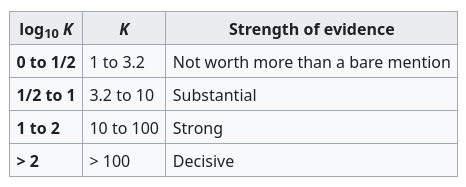

### Evidence Networks

In [6]:
from ili.evidence import K_EvidenceNetwork

runner = K_EvidenceNetwork(
    layer_width=32, added_layers=6,
    batch_norm_flag=1, alpha=2,
    train_args=dict(learning_rate=1e-6,
        training_batch_size=256,
        stop_after_epochs=30,
        validation_fraction=0.1)
)

In [10]:
train_idx, test_idx = fitter_smc.split_dataset(0.8, random_seed=42)
x_train_smc = fitter_smc.feature_array[train_idx]
y_train_smc = fitter_smc.fitted_parameter_array[train_idx]

train_idx, test_idx = fitter_calzetti.split_dataset(0.8, random_seed=42)
x_train_calzetti = fitter_calzetti.feature_array[train_idx]
y_train_calzetti = fitter_calzetti.fitted_parameter_array[train_idx]


loader_smc_train = NumpyLoader(x_train_smc, y_train_smc)
loader_calzetti_train = NumpyLoader(x_train_calzetti, y_train_calzetti)

Splitting dataset with 100000 samples into training and testing sets with 0.80 train fraction.
Splitting dataset with 100000 samples into training and testing sets with 0.80 train fraction.


In [ ]:
print(np.shape(y_train_calzetti), np.shape(y_train_smc))

In [ ]:
# M1 = SMC
# M2 = Calzetti
# log K = M1/M2

summary = runner.train(loader_smc_train, loader_calzetti_train)

[2025-05-22 01:26:24,650] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)


16 epochs [00:31,  1.98s/ epochs, loss_train=-0.00384, loss_val=-0.00308] 

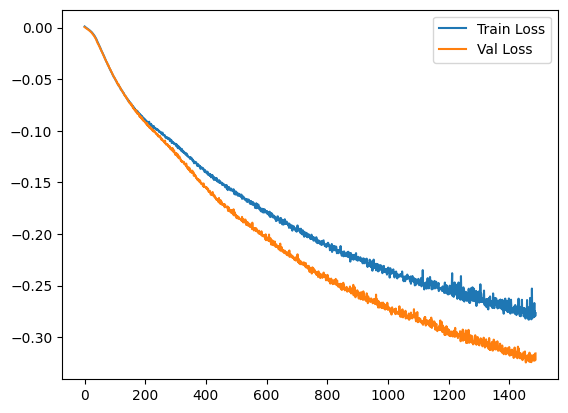

In [90]:
%matplotlib inline
plt.plot(summary['training_loss'], label='Train Loss')
plt.plot(summary['validation_loss'], label='Val Loss')
# plt.ylim(0.99,1.01)
plt.legend()
plt.show()

In [91]:
X_test_cal = fitter_calzetti.feature_array[test_idx]
y_test_cal = fitter_calzetti.fitted_parameter_array[test_idx]

params = fitter_calzetti.simple_fitted_parameter_names
tau_v_idx = params.index('tau_v')
tau_v_cal = y_test_cal[:, tau_v_idx]

log_Ks_cal = []
for x in X_test_cal:
    log_K = runner.predict(x).detach().numpy().squeeze()
    log_Ks_cal.append(log_K)

X_test_smc = fitter_smc.feature_array[test_idx]
y_test_smc = fitter_smc.fitted_parameter_array[test_idx]
params = fitter_smc.simple_fitted_parameter_names
tau_v_idx = params.index('tau_v')
tau_v_smc = y_test_smc[:, tau_v_idx]
log_Ks_smc = []
for x in X_test_smc:
    log_K = runner.predict(x).detach().numpy().squeeze()
    log_Ks_smc.append(log_K)

# Convert from ln to log10
log_Ks_cal = np.log10(np.exp(np.array(log_Ks_cal)))
log_Ks_smc = np.log10(np.exp(np.array(log_Ks_smc)))


In [71]:
jeffries_logK = {(-100, -2):'deciseivly against',
                    (-2, -1.5): 'very strongly against',
                    (-1.5, -1): 'strongly against',
                    (-1, -0.5): 'moderately against',
                    (-0.5, 0.5): 'No strong evidence',
                    (0.5, 1): 'moderately for',
                    (1, 1.5): 'strongly for',
                    (1.5, 2): 'very strongly for',
                    (2, 100): 'decisively for'}


Fraction of True Calzetti preferred as Calzetti with log K > 0.5: 0.3846
Fraction of True Calzetti prefered as SMC with log K < -0.5: 0.0144
Fraction of True Calzetti preferred as SMC strongly with log K < -1: 0.0017
Fraction of True SMC prefered as SMC with log K < -0.5: 0.43775
Fraction of True SMC preferred as Calzetti with log K > 0.5: 0.0621
Fraction of True SMC strongly preferred as Calzetti with log K > 0.5: 0.0039


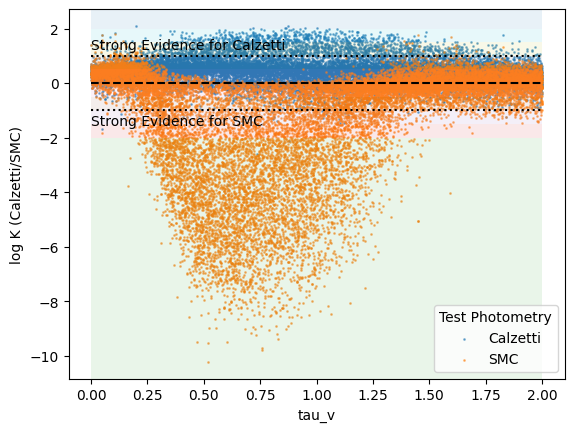

In [92]:
plt.scatter(tau_v_cal, log_Ks_cal, label='Calzetti', alpha=0.5, s=1)
plt.scatter(tau_v_smc, log_Ks_smc, label='SMC', alpha=0.5, s=1)

plt.xlabel('tau_v')
plt.ylabel('log K (Calzetti/SMC)')
plt.legend(title='Test Photometry')
plt.hlines(0, 0, 2, color='k', linestyle='--')
plt.hlines(1, 0, 2, color='k', linestyle='dotted')
plt.text(0, 1.15, 'Strong Evidence for Calzetti', rotation=0, fontsize=10, ha='left', va='bottom')
plt.hlines(-1, 0, 2, color='k', linestyle='dotted')
plt.text(0, -1.15, 'Strong Evidence for SMC', rotation=0, fontsize=10, ha='left', va='top')

plt.ylim(plt.ylim())
# shade regions in between
for key, value in jeffries_logK.items():
    plt.fill_betweenx([key[0], key[1]], 0, 2, alpha=0.1, label=value)
    

print('Fraction of True Calzetti preferred as Calzetti with log K > 0.5:', 
      len(log_Ks_cal[log_Ks_cal > 0.5])/len(log_Ks_cal))

print('Fraction of True Calzetti prefered as SMC with log K < -0.5:', 
      len(log_Ks_cal[log_Ks_cal < -0.5])/len(log_Ks_cal))

print('Fraction of True Calzetti preferred as SMC strongly with log K < -1:',
      len(log_Ks_cal[log_Ks_cal < -1])/len(log_Ks_cal))

print('Fraction of True SMC prefered as SMC with log K < -0.5:',
        len(log_Ks_smc[log_Ks_smc < -0.5])/len(log_Ks_smc))

print('Fraction of True SMC preferred as Calzetti with log K > 0.5:',
        len(log_Ks_smc[log_Ks_smc > 0.5])/len(log_Ks_smc))

print('Fraction of True SMC strongly preferred as Calzetti with log K > 0.5:',
        len(log_Ks_smc[log_Ks_smc > 1])/len(log_Ks_smc))



What are the parameters of one of the Calzetti test observations which strongly favour the SMC model?

In [72]:
mask = log_Ks_cal < -1
idx = np.random.choice(np.where(mask)[0], size=1, replace=False)

params = fitter_calzetti.fitted_parameter_array[idx]

for name, value in zip(fitter_calzetti.simple_fitted_parameter_names, params[0]):
    print(name, value)


redshift 10.940361976623535
log_mass 11.459956169128418
tau_v 0.30558231472969055
tau 0.15403662621974945
peak_age 135.33905257556896
log10metallicity -2.9921681880950928


Let's try with a Pop III model with different parameters

In [62]:
path = '/home/tharvey/work/output/grid_yggdrasil-1.3.3-POPIII-fcov_1_salpeter-10,1,500_5_z_12_logN_4.0_v1.hdf5'

fitter_yggdrasil = SBI_Fitter.init_from_hdf5('yggdrasil-1.3.3-POPIII-fcov_0.5_salpeter-10,1,500_5_z_12_logN_4.0_v1_compare', 
                                path, return_output=False)


In [74]:
from unyt import Jy

depths = 10**((np.array([30] * 20)-8.90)/-2.5) * Jy # 30 AB mag in all 22 filters

fitter_calzetti.create_feature_array_from_raw_photometry(extra_features=[],
                                                normalize_method=None, 
                                                scatter_fluxes=2, 
                                                include_errors_in_feature_array=True,
                                                depths=depths)    

fitter_yggdrasil.create_feature_array_from_raw_photometry(normalize_method=None,
                                                            extra_features=[],
                                                            scatter_fluxes=5, 
                                                            include_errors_in_feature_array=True,
                                                            depths=depths)     

depths = 10**((np.array([30] * 20)-8.90)/-2.5) * Jy # 30 AB mag in all 22 filters
                                                       

Scattering photometry 2 times for each row
---------------------------------------------
Features: 200000 features over 40 samples
---------------------------------------------
Feature: Min - Max
---------------------------------------------
NIRCam.F070W: 21.384 - 50.000 AB
NIRCam.F090W: 19.759 - 50.000 AB
NIRCam.F115W: 19.533 - 50.000 AB
NIRCam.F140M: 19.640 - 50.000 AB
NIRCam.F150W: 19.666 - 50.000 AB
NIRCam.F162M: 19.382 - 50.000 AB
NIRCam.F182M: 19.386 - 50.000 AB
NIRCam.F200W: 19.375 - 50.000 AB
NIRCam.F210M: 19.360 - 50.000 AB
NIRCam.F250M: 19.415 - 50.000 AB
NIRCam.F277W: 19.419 - 50.000 AB
NIRCam.F300M: 19.431 - 50.000 AB
NIRCam.F335M: 18.688 - 50.000 AB
NIRCam.F356W: 19.162 - 50.000 AB
NIRCam.F360M: 18.896 - 50.000 AB
NIRCam.F410M: 19.350 - 50.000 AB
NIRCam.F430M: 18.503 - 50.000 AB
NIRCam.F444W: 19.162 - 50.000 AB
NIRCam.F460M: 18.377 - 50.000 AB
NIRCam.F480M: 19.062 - 50.000 AB
unc_NIRCam.F070W: 0.000 - 5.563 AB
unc_NIRCam.F090W: 0.000 - 5.298 AB
unc_NIRCam.F115W: 0.000 - 4.

In [75]:
from ili.evidence import K_EvidenceNetwork

runner = K_EvidenceNetwork(
    layer_width=32, added_layers=6,
    batch_norm_flag=1, alpha=2,
    train_args=dict(learning_rate=1e-5,
        training_batch_size=256,
        stop_after_epochs=30,
        validation_fraction=0.1)
)

In [76]:
train_idx_yggdrasil, test_idx_yggdrasil = fitter_yggdrasil.split_dataset(0.8, random_seed=42)
x_train_yggdrasil = fitter_yggdrasil.feature_array[train_idx_yggdrasil]
y_train_yggdrasil = fitter_yggdrasil.fitted_parameter_array[train_idx_yggdrasil]

train_idx_cal, test_idx_cal = fitter_calzetti.split_dataset(0.8, random_seed=42)
x_train_calzetti = fitter_calzetti.feature_array[train_idx_cal]
y_train_calzetti = fitter_calzetti.fitted_parameter_array[train_idx_cal]


loader_yggdrasil_train = NumpyLoader(x_train_yggdrasil, y_train_yggdrasil)
loader_calzetti_train = NumpyLoader(x_train_calzetti, y_train_calzetti)

Splitting dataset with 50000 samples into training and testing sets with 0.80 train fraction.
Splitting dataset with 200000 samples into training and testing sets with 0.80 train fraction.


In [77]:
summary = runner.train(loader_yggdrasil_train, loader_calzetti_train)

0 epochs [00:00, ? epochs/s]

75 epochs [03:48,  3.05s/ epochs, loss_train=-0.781, loss_val=-0.82]  


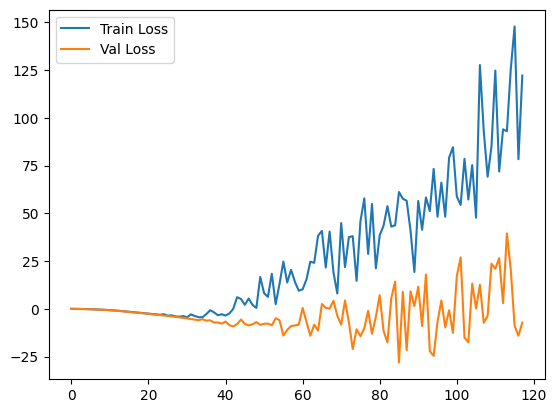

In [67]:
%matplotlib inline
plt.plot(summary['training_loss'], label='Train Loss')
plt.plot(summary['validation_loss'], label='Val Loss')
# plt.ylim(0.99,1.01)
plt.legend()
plt.show()

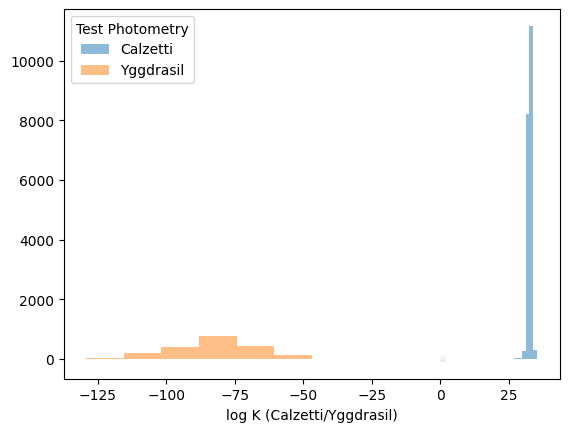

In [72]:
X_test_cal = fitter_calzetti.feature_array[test_idx_cal]
y_test_cal = fitter_calzetti.fitted_parameter_array[test_idx_cal]

log_Ks_cal = []
for x in X_test_cal:
    log_K = runner.predict(x).detach().numpy().squeeze()
    log_Ks_cal.append(log_K)

X_test_yggdrasil = fitter_yggdrasil.feature_array[test_idx_yggdrasil]
y_test_yggdrasil = fitter_yggdrasil.fitted_parameter_array[test_idx_yggdrasil]

log_Ks_yggdrasil = []
for x in X_test_yggdrasil:
    log_K = runner.predict(x).detach().numpy().squeeze()
    log_Ks_yggdrasil.append(log_K)


# Convert from ln to log10
log_Ks_cal = log_Ks_cal/np.log(10)
log_Ks_yggdrasil = log_Ks_yggdrasil/np.log(10)

plt.hist(log_Ks_cal, bins=10, alpha=0.5, label='Calzetti')
plt.hist(log_Ks_yggdrasil, bins=10, alpha=0.5, label='Yggdrasil')
plt.xlabel('log K (Calzetti/Yggdrasil)')
plt.legend(title='Test Photometry')
for key, value in jeffries_logK.items():
    plt.fill_betweenx([key[0], key[1]], 0, 2, alpha=0.1, label=value)
    


In [42]:
runner.save_model(f'/home/tharvey/work/ltu-ili_testing/models/{fitter_yggdrasil.name}/evidence_network_model_v1')

Trying to load a model - doesn't seem to work because architecture is different. Need to save the model in a way that is architecture independent.  


In [44]:
runner2 = K_EvidenceNetwork(
    layer_width=32, added_layers=6,
    batch_norm_flag=1, alpha=2,
    train_args=dict(learning_rate=1e-5,
        training_batch_size=256,
        stop_after_epochs=30,
        validation_fraction=0.1)
)

runner2.load_model(f'/home/tharvey/work/ltu-ili_testing/models/{fitter_yggdrasil.name}/evidence_network_model_v1.pth')

RuntimeError: Error(s) in loading state_dict for EvidenceNetworkSimple:
	Unexpected key(s) in state_dict: "residual_layers.1.0.0.weight", "residual_layers.1.0.0.bias", "residual_layers.1.0.2.weight", "residual_layers.1.0.2.bias", "residual_layers.1.0.2.running_mean", "residual_layers.1.0.2.running_var", "residual_layers.1.0.2.num_batches_tracked", "residual_layers.1.1.0.weight", "residual_layers.1.1.0.bias", "residual_layers.1.1.2.weight", "residual_layers.1.1.2.bias", "residual_layers.1.1.2.running_mean", "residual_layers.1.1.2.running_var", "residual_layers.1.1.2.num_batches_tracked", "residual_layers.2.0.0.weight", "residual_layers.2.0.0.bias", "residual_layers.2.0.2.weight", "residual_layers.2.0.2.bias", "residual_layers.2.0.2.running_mean", "residual_layers.2.0.2.running_var", "residual_layers.2.0.2.num_batches_tracked", "residual_layers.2.1.0.weight", "residual_layers.2.1.0.bias", "residual_layers.2.1.2.weight", "residual_layers.2.1.2.bias", "residual_layers.2.1.2.running_mean", "residual_layers.2.1.2.running_var", "residual_layers.2.1.2.num_batches_tracked", "residual_layers.3.0.0.weight", "residual_layers.3.0.0.bias", "residual_layers.3.0.2.weight", "residual_layers.3.0.2.bias", "residual_layers.3.0.2.running_mean", "residual_layers.3.0.2.running_var", "residual_layers.3.0.2.num_batches_tracked", "residual_layers.3.1.0.weight", "residual_layers.3.1.0.bias", "residual_layers.3.1.2.weight", "residual_layers.3.1.2.bias", "residual_layers.3.1.2.running_mean", "residual_layers.3.1.2.running_var", "residual_layers.3.1.2.num_batches_tracked", "residual_layers.4.0.0.weight", "residual_layers.4.0.0.bias", "residual_layers.4.0.2.weight", "residual_layers.4.0.2.bias", "residual_layers.4.0.2.running_mean", "residual_layers.4.0.2.running_var", "residual_layers.4.0.2.num_batches_tracked", "residual_layers.4.1.0.weight", "residual_layers.4.1.0.bias", "residual_layers.4.1.2.weight", "residual_layers.4.1.2.bias", "residual_layers.4.1.2.running_mean", "residual_layers.4.1.2.running_var", "residual_layers.4.1.2.num_batches_tracked", "residual_layers.5.0.0.weight", "residual_layers.5.0.0.bias", "residual_layers.5.0.2.weight", "residual_layers.5.0.2.bias", "residual_layers.5.0.2.running_mean", "residual_layers.5.0.2.running_var", "residual_layers.5.0.2.num_batches_tracked", "residual_layers.5.1.0.weight", "residual_layers.5.1.0.bias", "residual_layers.5.1.2.weight", "residual_layers.5.1.2.bias", "residual_layers.5.1.2.running_mean", "residual_layers.5.1.2.running_var", "residual_layers.5.1.2.num_batches_tracked", "residual_layers.0.0.2.weight", "residual_layers.0.0.2.bias", "residual_layers.0.0.2.running_mean", "residual_layers.0.0.2.running_var", "residual_layers.0.0.2.num_batches_tracked", "residual_layers.0.1.2.weight", "residual_layers.0.1.2.bias", "residual_layers.0.1.2.running_mean", "residual_layers.0.1.2.running_var", "residual_layers.0.1.2.num_batches_tracked". 
	size mismatch for initial_layer.0.weight: copying a param with shape torch.Size([32, 20]) from checkpoint, the shape in current model is torch.Size([6, 32]).
	size mismatch for initial_layer.0.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([6]).
	size mismatch for initial_layer.2.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([6]).
	size mismatch for initial_layer.2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([6]).
	size mismatch for initial_layer.2.running_mean: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([6]).
	size mismatch for initial_layer.2.running_var: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([6]).
	size mismatch for hidden_layers.0.0.weight: copying a param with shape torch.Size([32, 32]) from checkpoint, the shape in current model is torch.Size([6, 6]).
	size mismatch for hidden_layers.0.0.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([6]).
	size mismatch for hidden_layers.0.2.weight: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([6]).
	size mismatch for hidden_layers.0.2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([6]).
	size mismatch for hidden_layers.0.2.running_mean: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([6]).
	size mismatch for hidden_layers.0.2.running_var: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([6]).
	size mismatch for residual_layers.0.0.0.weight: copying a param with shape torch.Size([32, 32]) from checkpoint, the shape in current model is torch.Size([6, 6]).
	size mismatch for residual_layers.0.0.0.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([6]).
	size mismatch for residual_layers.0.1.0.weight: copying a param with shape torch.Size([32, 32]) from checkpoint, the shape in current model is torch.Size([6, 6]).
	size mismatch for residual_layers.0.1.0.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([6]).
	size mismatch for post_residual.0.weight: copying a param with shape torch.Size([32, 32]) from checkpoint, the shape in current model is torch.Size([6, 6]).
	size mismatch for post_residual.0.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([6]).
	size mismatch for output_layer.weight: copying a param with shape torch.Size([1, 32]) from checkpoint, the shape in current model is torch.Size([1, 6]).

In [56]:
# Setup  a fake model comparison where we are doing a test model comparison between
# two models.

def first_model(x, params):
    noise = np.random.normal(loc=0, scale=1, size=x.shape)
    model = params[0] * x + params[1] + x**2 * params[2] 
    return model + noise

def second_model(x, params):
    noise = np.random.normal(loc=0, scale=1, size=x.shape)
    model = params[0] * x + params[1] + x**2 * params[2] + x**3 * params[3]
    return model + noise
    
# Do comparison

x = np.random.uniform(0, 100, size=(1000, 5))

params1 = np.random.uniform(0, 1, size=(1000, 5))
params2 = np.random.uniform(0, 1, size=(1000, 5))
model1 = first_model(x, params1)
model2 = second_model(x, params2)

params1 = 
loader_model1 = NumpyLoader(model1, params1)
loader_model2 = NumpyLoader(model2, params2)
runner = K_EvidenceNetwork(
    layer_width=32, added_layers=6,
    batch_norm_flag=1, alpha=2,
    train_args=dict(learning_rate=1e-6,
        training_batch_size=256,
        stop_after_epochs=30,
        validation_fraction=0.1)
)

summary = runner.train(loader_model1, loader_model2)


10 epochs [00:00, 44.84 epochs/s, loss_train=0.0626, loss_val=nan]

31 epochs [00:00, 43.28 epochs/s, loss_train=0.0591, loss_val=nan]


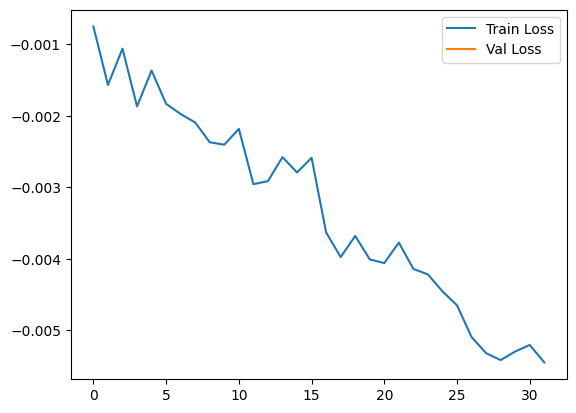

In [53]:
%matplotlib inline
plt.plot(summary['training_loss'], label='Train Loss')
plt.plot(summary['validation_loss'], label='Val Loss')
# plt.ylim(0.99,1.01)
plt.legend()
plt.show()

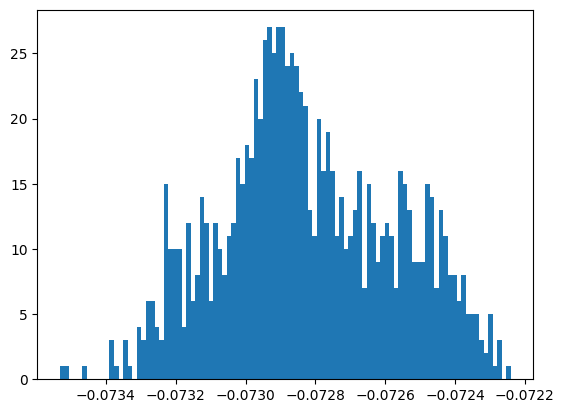

In [55]:
#test the model

x_test = np.random.uniform(0, 100, size=(1000, 5))
params1_test = np.random.uniform(0, 1, size=(1000, 5))
params2_test = np.random.uniform(0, 1, size=(1000, 5))
model1_test = first_model(x_test, params1_test)
model2_test = second_model(x_test, params2_test)

logK = []

for x in x_test:
    log_K = runner.predict(x).detach().numpy().squeeze()
    logK.append(log_K)
logK = np.array(logK)


plt.hist(logK, bins=100);